C:\Users\d64105\AppData\Local\Temp\ipykernel_5032\973492422.py:19: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



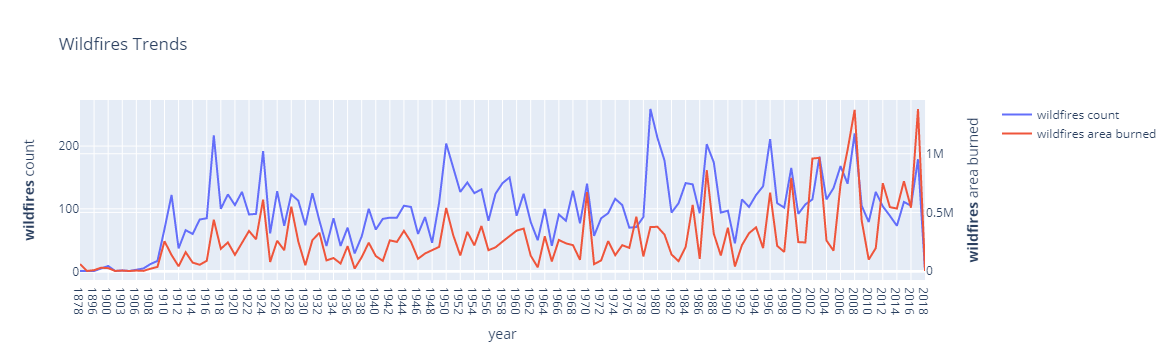

In [45]:
import pandas as pd
import numpy as np
import requests
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Read data
df = pd.read_csv('wildfires_with_geocoord.csv', parse_dates=True)

# Make grouping by year - counts
grouped_counts = df.groupby('year').count()
grouped_counts = grouped_counts.reset_index()
grouped_counts = grouped_counts[['year', 'agency']]
grouped_counts = grouped_counts.rename(columns={'agency':'count'})
grouped_counts = grouped_counts.sort_values('year')

# Make grouping by year - acres burned
grouped_area = df.groupby('year').sum()
grouped_area = grouped_area.reset_index()
grouped_area = grouped_area[['year', 'gis_acres']]
grouped_area = grouped_area.rename(columns={'gis_acres':'area_burned'})
grouped_area = grouped_area.sort_values('year')

# Merge
df_grouped = grouped_counts.merge(grouped_area)
# Save
df_grouped.to_csv('wildfires_grouped_task2_2.csv', index=False)


# Read
df_grouped = pd.read_csv('wildfires_grouped_task2_2.csv')


# Create figure with secondary y-axis
fig_trends = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig_trends.add_trace(
    go.Scatter(x=df_grouped['year'].astype(str), y=df_grouped['count'], name="wildfires count"),
    secondary_y=False,
)

fig_trends.add_trace(
    go.Scatter(x=df_grouped['year'].astype(str), y=df_grouped['area_burned'], name="wildfires area burned"),
    secondary_y=True,
)

# Add figure title
fig_trends.update_layout(
    title_text="Wildfires Trends"
)

# Set x-axis title
fig_trends.update_xaxes(title_text="year")

# Set y-axes titles
fig_trends.update_yaxes(title_text="<b>wildfires</b> count", secondary_y=False)
fig_trends.update_yaxes(title_text="<b>wildfires</b> area burned", secondary_y=True)

fig_trends.show()